In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [2]:
import matplotlib.pyplot as plot
import seaborn
from sklearn.metrics import roc_auc_score
#nltk.download('stopwords')

In [3]:
stiri_adevarate = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
stiri_false = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")

In [4]:
stiri_adevarate.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


<AxesSubplot:xlabel='subject', ylabel='count'>

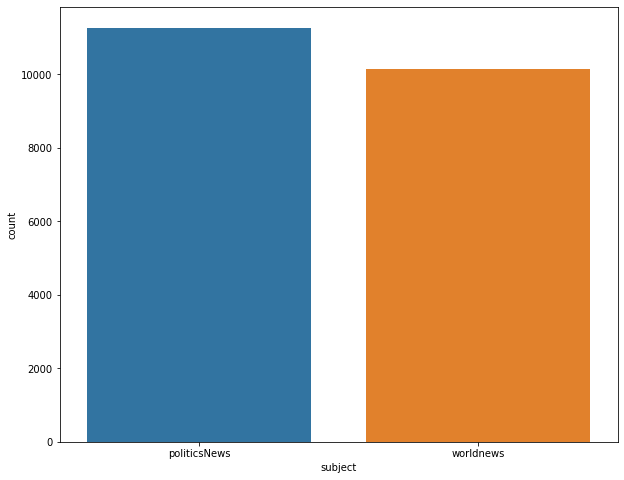

In [5]:
plot.figure(figsize=(10,8))
seaborn.countplot(data = stiri_adevarate, x='subject')

<AxesSubplot:xlabel='subject', ylabel='count'>

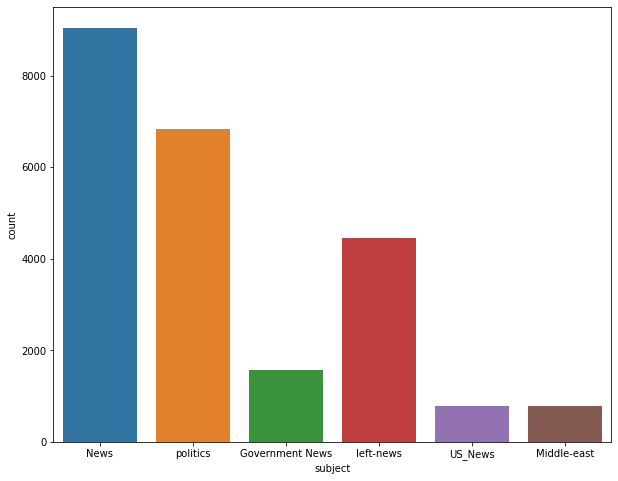

In [6]:
plot.figure(figsize=(10,8))
seaborn.countplot(data = stiri_false, x='subject')

<AxesSubplot:xlabel='subject', ylabel='count'>

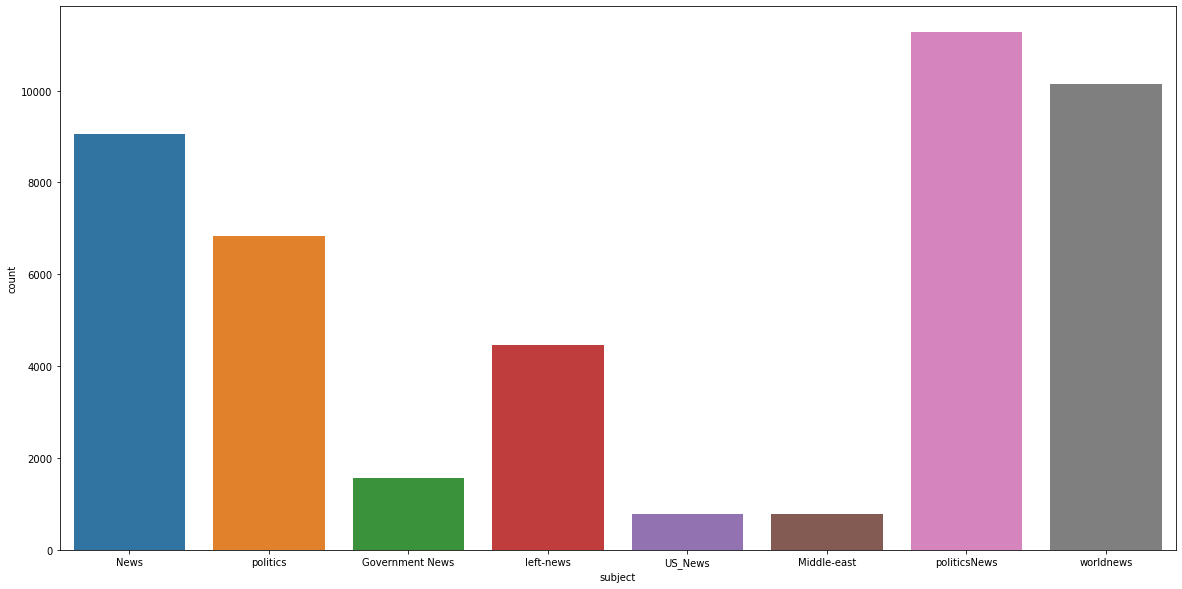

In [7]:
plot.figure(figsize=(20, 10))
seaborn.countplot(x="subject", data = pd.concat([stiri_false, stiri_adevarate]))

In [8]:
stiri_adevarate["class"] = 1
stiri_false["class"] = 0
dataframe = pd.concat([stiri_false, stiri_adevarate])
dataframe['text'] = dataframe['text'] + " " + dataframe['title']
del dataframe['title']
del dataframe['subject']
del dataframe['date']

In [9]:
dataframe.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [10]:
trump_adev = stiri_adevarate[stiri_adevarate['text'].str.contains('Donald Trump')]
trump_adev.count()['text']

9172

In [11]:
trump_fals = stiri_false[stiri_false['text'].str.contains('Donald Trump')]
trump_fals.count()['text']

8554

In [12]:
nk_adev = stiri_adevarate[stiri_adevarate['text'].str.contains('North Korea')]
nk_adev.count()['text']

1515

In [13]:
nk_fals = stiri_false[stiri_false['text'].str.contains('North Korea')]
nk_fals.count()['text']

324

<AxesSubplot:xlabel='class', ylabel='count'>

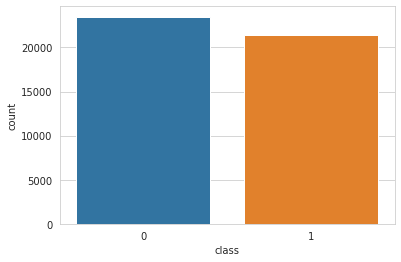

In [14]:
seaborn.set_style("whitegrid")
seaborn.countplot(x="class", data = dataframe)

In [15]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

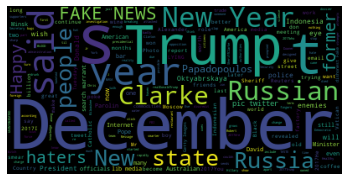

In [16]:
cloud_text = dataframe["text"].values
wordcloud = WordCloud().generate(str(cloud_text))
plot.imshow(wordcloud)
plot.axis("off")
plot.show()

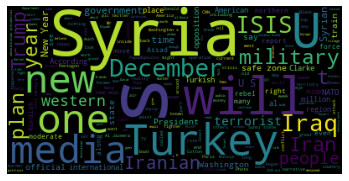

In [17]:
cloud_text_fake = (stiri_false["text"] + " " + stiri_false["title"]).values
wordcloud = WordCloud().generate(str(cloud_text_fake))
plot.imshow(wordcloud)
plot.axis("off")
plot.show()

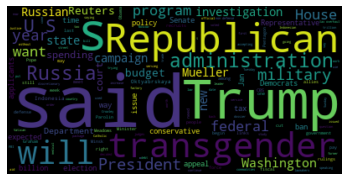

In [18]:
cloud_text_true = (stiri_adevarate["text"] + " " + stiri_adevarate["title"]).values
wordcloud = WordCloud().generate(str(cloud_text_true))
plot.imshow(wordcloud, interpolation='bilinear')
plot.axis("off")
plot.show()

In [19]:
the = dataframe[dataframe['text'].str.contains('the')]
the.count()['text']

43683

In [20]:
type(dataframe['text'])

pandas.core.series.Series

In [21]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
stopW = stopwords.words('english')
custom_stop_words = text.ENGLISH_STOP_WORDS.union(stopW)

In [23]:
tfidvectorizer = TfidfVectorizer(max_df=0.8, stop_words = custom_stop_words, max_features=11000, ngram_range=(1,2))

In [24]:
del stopW
del custom_stop_words
del stiri_false
del stiri_adevarate

In [25]:
caracteristici = dataframe['text'] # x caracteristica
predictii = dataframe['class'] # y predictie

In [26]:
dataframe.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(caracteristici, predictii, test_size=0.20, random_state=1)

In [28]:
tfidvectorizer.fit(X_train)

TfidfVectorizer(max_df=0.8, max_features=11000, ngram_range=(1, 2),
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'ain',
                                      'all', 'almost', 'alone', 'along',
                                      'already', 'also', 'although', 'always',
                                      'am', 'among', 'amongst', 'amoungst',
                                      'amount', 'an', 'and', 'another', 'any',
                                      'anyhow', 'anyone', 'anything', 'anyway', ...}))

In [29]:
X_train

19625    Nothing says  Thanksgiving  or  family  like a...
21965    What this story shows is that while there are ...
12561    CAIRO (Reuters) - Russian President Vladimir P...
4137     WASHINGTON (Reuters) - President Donald Trump ...
1608     WASHINGTON (Reuters) - U.S. Senator John McCai...
                               ...                        
20242    GUATEMALA CITY (Reuters) - Guatemala s federal...
9030     WASHINGTON (Reuters) - U.S. House of Represent...
5192     While in Virginia, GOP presidential nominee Do...
12172    Judge Jeanine Pirro has had it with the left a...
9522     WASHINGTON (Reuters) - A congressional committ...
Name: text, Length: 35918, dtype: object

In [30]:
X_train = tfidvectorizer.transform(X_train).toarray()
X_test = tfidvectorizer.transform(X_test).toarray()


In [31]:
X_test.shape

(8980, 11000)

In [32]:
type(X_train)

numpy.ndarray

In [33]:
rows_X_train, cols_X_train = X_train.shape
X_train.shape


(35918, 11000)

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
model = Sequential()
model.add(Dense(units = 200 , activation = 'relu' , input_shape = (rows_X_train, cols_X_train)))
model.add(Dense(units = 150 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 100 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 30 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))

2022-08-24 18:46:56.812831: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-24 18:46:56.930097: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-24 18:46:56.930970: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-24 18:46:56.932538: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [35]:

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [36]:
istoric = model.fit(x=X_train, y=y_train, epochs=10, verbose = True, validation_split=0.1)

2022-08-24 18:47:00.511176: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1422344000 exceeds 10% of free system memory.
2022-08-24 18:47:02.111732: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1422344000 exceeds 10% of free system memory.
2022-08-24 18:47:03.272801: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1011/1011 [==============================] - 5s 4ms/step - loss: 0.0650 - accuracy: 0.9760 - val_loss: 0.0250 - val_accuracy: 0.9914
Epoch 2/10
1011/1011 [==============================] - 4s 4ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.0284 - val_accuracy: 0.9928
Epoch 3/10
1011/1011 [==============================] - 3s 3ms/step - loss: 0.0040 - accuracy: 0.9985 - val_loss: 0.0306 - val_accuracy: 0.9914
Epoch 4/10
1011/1011 [==============================] - 3s 3ms/step - loss: 0.0036 - accuracy: 0.9986 - val_loss: 0.0415 - val_accuracy: 0.9908
Epoch 5/10
1011/1011 [==============================] - 4s 4ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0514 - val_accuracy: 0.9919
Epoch 6/10
1011/1011 [==============================] - 3s 3ms/step - loss: 6.4241e-04 - accuracy: 0.9998 - val_loss: 0.0545 - val_accuracy: 0.9919
Epoch 7/10
1011/1011 [==============================] - 3s 3ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0577 - val_accur

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 35918, 200)        2200200   
_________________________________________________________________
dense_1 (Dense)              (None, 35918, 150)        30150     
_________________________________________________________________
dropout (Dropout)            (None, 35918, 150)        0         
_________________________________________________________________
dense_2 (Dense)              (None, 35918, 100)        15100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 35918, 100)        0         
_________________________________________________________________
dense_3 (Dense)              (None, 35918, 30)         3030      
_________________________________________________________________
dense_4 (Dense)              (None, 35918, 1)          3

In [38]:
predictii_model = (model.predict(X_test) > 0.5).astype("int32")

In [39]:
predictii_model[:3]

array([[0],
       [1],
       [0]], dtype=int32)

In [40]:
print('acuratete model neuronal: ', roc_auc_score(y_test, predictii_model))

acuratete model neuronal:  0.9927532033118331


In [41]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictii_model)
cm



array([[4649,   33],
       [  32, 4266]])

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
mnb = MultinomialNB(alpha=0.1) 

In [44]:
mnb.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [45]:
y_prezis = mnb.predict(X_test)

In [46]:
y_prezis[:3]

array([0, 1, 0])

In [47]:
print('acuratete model MNB: ', roc_auc_score(y_test, y_prezis))

acuratete model MNB:  0.9555103861029112


In [48]:
from sklearn.metrics import classification_report

In [49]:
print(confusion_matrix(y_test, y_prezis, labels=[0, 1]))

[[4480  202]
 [ 197 4101]]


In [50]:
cm = confusion_matrix(y_test, y_prezis , labels=[0, 1])

<AxesSubplot:>

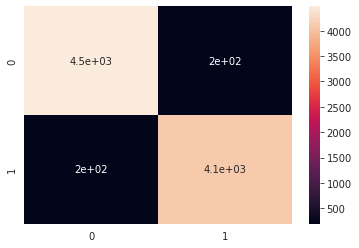

In [51]:
ax= plot.subplot()
seaborn.heatmap(cm, annot=True, ax= ax)

In [52]:
!pip install -U tensorflow-text==2.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 30.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 39.0 MB/s eta 0:00:00
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=77067 sha256=c13fe335af5e133b8fcbd1c97c4ef1888fdac2fcf74d155f64ad92c5d8dbf98b
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.14.1
    Uninstalling wrapt-1.14.1:
      Successfully uninstalled wrapt-1.14.1
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.1.1
    Uninstalling typing_extensions-4.1.1:
      Successfully uninstalled typing_extensions-4.1

In [53]:
import tensorflow
import tensorflow_text as text
import tensorflow_hub as hub

In [54]:
bert_preprocesare = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [55]:
# strat Bert
text_intrare = tensorflow.keras.layers.Input(shape=(), dtype=tensorflow.string)
text_p = bert_preprocesare(text_intrare)
iesire = bert_encoder(text_p)

strat = tensorflow.keras.layers.Dropout(0.1, name="dropout")(iesire['pooled_output'])
strat = tensorflow.keras.layers.Dense(1, activation='sigmoid')(strat)

# Construim modelul final
model = tensorflow.keras.Model(inputs=[text_intrare], outputs = [strat])

In [56]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        {'input_word_ids': ( 0           input_1[0][0]                    
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      {'default': (None, 7 109482241   keras_layer[0][0]                
                                                                 keras_layer[0][1]                
                                                                 keras_layer[0][2]                
______________________________________________________________________________________________

In [57]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=tensorflow.keras.metrics.BinaryAccuracy(name='accuracy'))

In [58]:
X_train, X_test, y_train, y_test = train_test_split(caracteristici, predictii, test_size=0.20, random_state=1)

In [59]:
model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1011/1011 [==============================] - 285s 275ms/step - loss: 0.3181 - accuracy: 0.8857 - val_loss: 0.1896 - val_accuracy: 0.9443
Epoch 2/10
1011/1011 [==============================] - 275s 272ms/step - loss: 0.1821 - accuracy: 0.9393 - val_loss: 0.1415 - val_accuracy: 0.9527
Epoch 3/10
1011/1011 [==============================] - 275s 272ms/step - loss: 0.1547 - accuracy: 0.9455 - val_loss: 0.1338 - val_accuracy: 0.9482
Epoch 4/10
1011/1011 [==============================] - 278s 275ms/step - loss: 0.1412 - accuracy: 0.9501 - val_loss: 0.1108 - val_accuracy: 0.9616
Epoch 5/10
1011/1011 [==============================] - 276s 273ms/step - loss: 0.1315 - accuracy: 0.9530 - val_loss: 0.1052 - val_accuracy: 0.9649
Epoch 6/10
1011/1011 [==============================] - 278s 275ms/step - loss: 0.1268 - accuracy: 0.9551 - val_loss: 0.0942 - val_accuracy: 0.9680
Epoch 7/10
1011/1011 [==============================] - 293s 290ms/step - loss: 0.1222 - accuracy: 0.9545 - val_

In [60]:
y_prezis = model.predict(X_test)

In [61]:
predictii_model = (y_prezis > 0.5).astype("int32")

In [62]:
print('acuratete model BERT: ', roc_auc_score(y_test, predictii_model))

acuratete model BERT:  0.9741039164873879


In [63]:
cm = confusion_matrix(y_test, predictii_model)
cm 

array([[4604,   78],
       [ 151, 4147]])